In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# import utils
import sys
sys.path.append('../../../utils')
import calibrate, simulate, misc

In [2]:
df = pd.read_csv("../../../../datasets/Dukascopy/MC.FREUR_Ticks_05.03.2024-05.03.2024.csv")
df['Mid'] = (df['Ask'] + df['Bid']) / 2

# TODO: use log(price) instead of price?

## 1. Ask

mu: 0.0014, alpha: 0.35, beta: 1.42


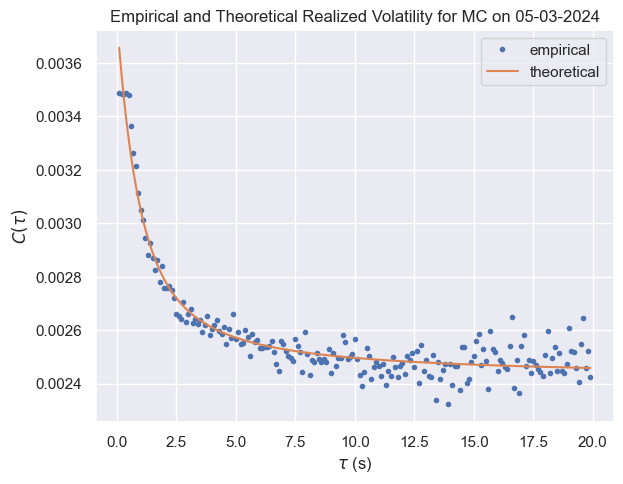

In [7]:
ts = pd.Series(df['Ask'].values, index=pd.to_datetime(df['Local time'])) # Ask and Bid work but Mid doesn't yield the expected signature plot, why?

taus = misc.range_timedelta(100, 20000, 100, 'ms')
C_emp_values = [misc.C_emp(ts, tau) for tau in taus]
# C_emp_values = [C_emp_values[i]/C_emp_values[0] for i in range(len(C_emp_values))] # makes mu bigger
theta_hat = misc.curve_calibrate(taus, C_emp_values)

C_th_func = misc.C_th(theta_hat)
C_th_values = [C_th_func(tau.total_seconds()) for tau in taus]

print(f'mu: {theta_hat[0]:.4f}, alpha: {theta_hat[1]:.2f}, beta: {theta_hat[2]:.2f}')

plt.figure()
plt.plot(taus.dt.total_seconds(), C_emp_values, label='empirical', ls='', marker='.')
plt.plot(taus.dt.total_seconds(), C_th_values, label='theoretical')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$C(\tau)$')
plt.legend()
plt.tight_layout()
plt.title('Empirical and Theoretical Realized Volatility for MC on 05-03-2024')
plt.show()

## 2. Bid

mu: 0.0014, alpha: 0.33, beta: 1.35


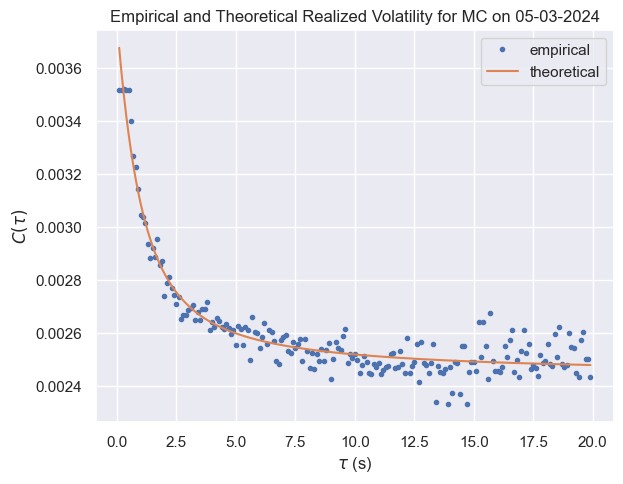

In [8]:
ts = pd.Series(df['Bid'].values, index=pd.to_datetime(df['Local time'])) # Ask and Bid work but Mid doesn't yield the expected signature plot, why?

taus = misc.range_timedelta(100, 20000, 100, 'ms')
C_emp_values = [misc.C_emp(ts, tau) for tau in taus]
# C_emp_values = [C_emp_values[i]/C_emp_values[0] for i in range(len(C_emp_values))] # makes mu bigger
theta_hat = misc.curve_calibrate(taus, C_emp_values)

C_th_func = misc.C_th(theta_hat)
C_th_values = [C_th_func(tau.total_seconds()) for tau in taus]

print(f'mu: {theta_hat[0]:.4f}, alpha: {theta_hat[1]:.2f}, beta: {theta_hat[2]:.2f}')

plt.figure()
plt.plot(taus.dt.total_seconds(), C_emp_values, label='empirical', ls='', marker='.')
plt.plot(taus.dt.total_seconds(), C_th_values, label='theoretical')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$C(\tau)$')
plt.legend()
plt.tight_layout()
plt.title('Empirical and Theoretical Realized Volatility for MC on 05-03-2024')
plt.show()

## 3. Mid

Doesn't work as well... Why? What's going on? 

mu: 0.0012, alpha: 0.28, beta: 4.84


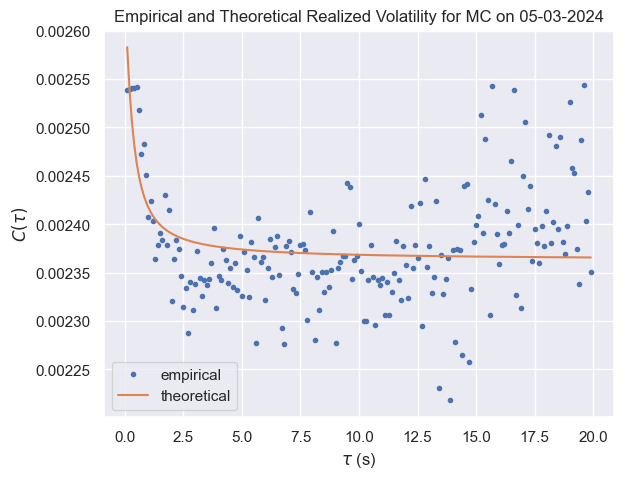

In [11]:
ts = pd.Series(df['Mid'].values, index=pd.to_datetime(df['Local time'])) # Ask and Bid work but Mid doesn't yield the expected signature plot, why?

taus = misc.range_timedelta(100, 20000, 100, 'ms')
C_emp_values = [misc.C_emp(ts, tau) for tau in taus]
# C_emp_values = [C_emp_values[i]/C_emp_values[0] for i in range(len(C_emp_values))] # makes mu bigger
theta_hat = misc.curve_calibrate(taus, C_emp_values)

C_th_func = misc.C_th(theta_hat)
C_th_values = [C_th_func(tau.total_seconds()) for tau in taus]

print(f'mu: {theta_hat[0]:.4f}, alpha: {theta_hat[1]:.2f}, beta: {theta_hat[2]:.2f}')

plt.figure()
plt.plot(taus.dt.total_seconds(), C_emp_values, label='empirical', ls='', marker='.')
plt.plot(taus.dt.total_seconds(), C_th_values, label='theoretical')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$C(\tau)$')
plt.legend()
plt.tight_layout()
plt.title('Empirical and Theoretical Realized Volatility for MC on 05-03-2024')
plt.show()